In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=pd.read_csv(r'C:\Users\prince.garg\Desktop\Deepika\LetsUpgrade_AI_ML\titanic project\Titanic data\train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
PassengerId,891.0,446.000000,257.353842,1.00,9.9,45.500,90.00,223.5000,446.0000,668.5,802.0000,882.10000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0,0.000,0.00,0.0000,0.0000,1.0,1.0000,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,1.0,1.000,1.00,2.0000,3.0000,3.0,3.0000,3.00000,3.0000
Age,714.0,29.699118,14.526497,0.42,1.0,4.000,14.00,20.1250,28.0000,38.0,50.0000,65.87000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0,0.000,0.00,0.0000,0.0000,1.0,1.0000,5.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0,0.000,0.00,0.0000,0.0000,0.0,2.0000,4.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,0.0,7.225,7.55,7.9104,14.4542,31.0,77.9583,249.00622,512.3292


In [6]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
titanic['Age'].fillna(29,inplace=True)

In [4]:
titanic['Embarked'].fillna('S',inplace=True)

# Decision Tree

In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
titanic['Sex']=le.fit_transform(titanic['Sex'])

In [12]:
X=titanic[['Age','Sex','Fare']]

In [13]:
Y=titanic['Survived']

In [14]:
Dt=DecisionTreeClassifier(max_depth=3,min_samples_leaf=20)

In [15]:
Dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
Dt.score(X,Y)

0.7957351290684624

In [17]:
with open('dtree_titanic.dot','w') as f:
    f=tree.export_graphviz(Dt,feature_names=['Age','Sex','Fare'],out_file=f);

# prediction on test data

In [18]:
tit_test=pd.read_csv(r'C:\Users\prince.garg\Desktop\Deepika\LetsUpgrade_AI_ML\titanic project\Titanic data\test.csv')

In [19]:
tit_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [20]:
tit_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
tit_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,417.0,1100.635492,120.923774,892.00,996.0000,1101.0000,1205.0,1309.0000
Pclass,417.0,2.263789,0.842077,1.00,1.0000,3.0000,3.0,3.0000
Age,417.0,33.237410,13.922884,0.17,23.0000,32.0000,45.0,76.0000
SibSp,417.0,0.448441,0.897568,0.00,0.0000,0.0000,1.0,8.0000
Parch,417.0,0.393285,0.982419,0.00,0.0000,0.0000,0.0,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.5,512.3292


In [22]:
tit_test['Sex']=le.fit_transform(tit_test['Sex'])

In [23]:
X1=tit_test[['Age','Sex','Fare']]

In [24]:
test_pred=Dt.predict(X1)

In [25]:
pred_output=pd.DataFrame({'PassengerId':tit_test['PassengerId'],'Survived':test_pred})

In [26]:
pred_output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
412,1305,0
413,1306,1
414,1307,0
415,1308,0


In [27]:
pred_output.to_csv(r'C:\Users\prince.garg\Desktop\Deepika\LetsUpgrade_AI_ML\titanic project\Output.csv')

# naive Bayes

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [10]:
titanic['Embarked']=le.fit_transform(titanic['Embarked'])

In [11]:
X1=['Survived','Pclass','Sex','Parch','Embarked','SibSp']

In [47]:
for i in X1:
    X2=titanic.drop([i,'PassengerId','Name','Ticket','Cabin'],axis=1)
    Y2=titanic[i]
    x_train,x_test,y_train,y_test=train_test_split(X2,Y2,test_size=0.3,random_state=0)
    nb=BernoulliNB()
    nb.fit(x_train,y_train)
    y_pred=nb.predict(x_test)
    print('Accuracy score when DV is',i,':')
    print(accuracy_score(y_test,y_pred))
    print('Confusion matrix when DV is',i)
    print(confusion_matrix(y_test,y_pred))

Accuracy score when DV is Survived :
0.7835820895522388
Confusion matrix when DV is Survived
[[137  31]
 [ 27  73]]
Accuracy score when DV is Pclass :
0.5932835820895522
Confusion matrix when DV is Pclass
[[ 33   0  27]
 [ 21   0  31]
 [ 29   1 126]]
Accuracy score when DV is Sex :
0.7835820895522388
Confusion matrix when DV is Sex
[[ 72  27]
 [ 31 138]]
Accuracy score when DV is Parch :
0.7425373134328358
Confusion matrix when DV is Parch
[[189  15   0   0   0]
 [ 30  10   0   0   0]
 [ 17   4   0   0   0]
 [  2   0   0   0   0]
 [  1   0   0   0   0]]
Accuracy score when DV is Embarked :
0.6977611940298507
Confusion matrix when DV is Embarked
[[  0   0  60]
 [  0   0  21]
 [  0   0 187]]
Accuracy score when DV is SibSp :
0.6791044776119403
Confusion matrix when DV is SibSp
[[162  19   0   0   0   0]
 [ 45  20   0   0   0   0]
 [  4   3   0   0   0   0]
 [  4   2   0   0   0   0]
 [  4   3   0   0   0   0]
 [  1   1   0   0   0   0]]


# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
X3=titanic.drop(['Survived','PassengerId','Name','Ticket','Cabin'],axis=1)

In [17]:
Y3=titanic['Survived']

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X3,Y3,test_size=0.3,random_state=0)

In [23]:
X_test.shape

(268, 7)

In [44]:
knn=KNeighborsClassifier(n_neighbors=37)

In [45]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=37, p=2,
           weights='uniform')

In [46]:
Y_pred=knn.predict(X_test)

In [47]:
accuracy_score(Y_test,Y_pred)

0.746268656716418

In [48]:
confusion_matrix(Y_test,Y_pred)

array([[151,  17],
       [ 51,  49]], dtype=int64)

# Choosing K value

In [51]:
error_rate=[]
for i in range(1,269):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=Y_test))


In [72]:
Acc_rate=[]
for i in range(1,269):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    Acc_rate.append(accuracy_score(Y_test,pred_i))


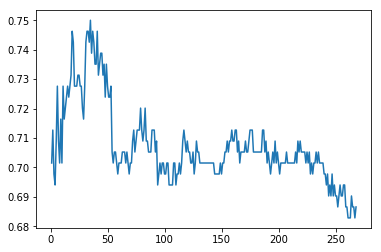

In [73]:
plt.plot(range(1,269),Acc_rate)

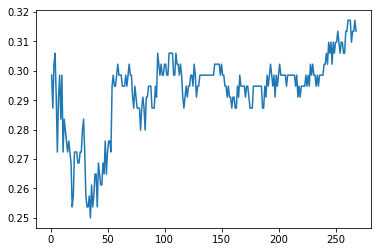

In [52]:
plt.plot(range(1,269),error_rate)

From above graph we can conclude that error rate is minimum for k value = 38

# SVM

In [54]:
from sklearn.svm import SVC

In [65]:
svm=SVC(C=100,gamma=0.01)

In [66]:
svm.fit(X_train,Y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
pred=svm.predict(X_test)

In [68]:
accuracy_score(Y_test,pred)

0.7574626865671642

In [69]:
confusion_matrix(Y_test,pred)

array([[140,  28],
       [ 37,  63]], dtype=int64)